# Miscellaenous

Just trying stuff out. 

In [1]:
import numpy as np
np.random.seed(42)

In [3]:
#initial state is Gaussian mean 0, covariance sigma_0^2 I_m
#noise is Gaussian mean 0, covariance sigma_z^2 I_m
#cost 1 is k^2/m * squared l2 norm of u_1
# cost 2 is 1/m * squared l2 norm of x_2
def gen_initial_state(dimension, cov_term): 
    '''
    Generates a vector of dimension DIMENSION
    from a multivariate Gaussian distribution.
    Mean is always 0, and covariance is a scalar 
    multiple of the identity matrix.
    
    dimension: An positive integer. The dimension of the vector
    cov_term: A scalar to multiply the covariance matrix by. 
    '''
    return np.random.multivariate_normal(np.zeros(dimension), cov_term * np.eye(dimension))

In [10]:
def cost(control_1, x_2, k): 
    '''
    Cost function. 
    Input: 
    control_1: The u_1 vector
    x_2: The output after control 2
    k: A scalar term weighting the cost of control_1
    '''
    dim = len(control_1)
    return ((k**2)*np.linalg.norm(control_1)**2 + np.linalg.norm(x_2)**2) / dim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def step_func(step_point): 
    def stepper(x): 
        if x > step_point: 
            return 1
        else: 
            return 0
    return stepper

In [4]:
zero_step = step_func(0)

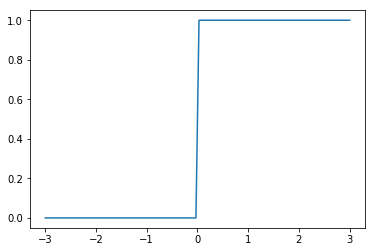

In [5]:
plt.plot(np.linspace(-3, 3, num=100), [zero_step(x) for x in np.linspace(-3, 3, num=100)])

In [6]:
a = {3: 0, 5: 1}

In [7]:
a[3]

0

In [16]:
x_range = np.linspace(-20, 20, num=40)

In [18]:
np.piecewise(x_range, [x_range < -5, x_range < -3, x_range >= 3], [-3, 1, 4])

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.])

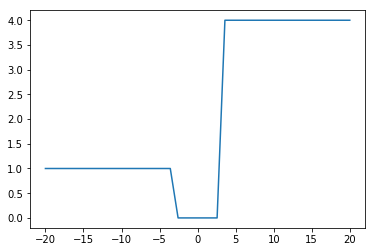

In [21]:
plt.plot(x_range, np.piecewise(x_range, [x_range < -5, x_range < -3, x_range >= 3], [-3, 1, 4]))

In [23]:
np.random.randint(low=0, high=10, size=(50, 10))/10

array([[ 0.1,  0.4,  0.8,  0.8,  0.7,  0. ,  0. ,  0.8,  0.7,  0.9],
       [ 0.8,  0.6,  0.2,  0.2,  0.1,  0.4,  0.2,  0.5,  0.1,  0.2],
       [ 0.4,  0. ,  0. ,  0.9,  0.8,  0.6,  0. ,  0.7,  0.2,  0.7],
       [ 0.4,  0. ,  0.6,  0.4,  0.5,  0.5,  0.7,  0.8,  0.1,  0.8],
       [ 0.9,  0.8,  0.9,  0.9,  0.6,  0. ,  0.6,  0.9,  0.4,  0.5],
       [ 0.9,  0.6,  0.4,  0.6,  0.8,  0.2,  0.7,  0.1,  0.6,  0.1],
       [ 0.3,  0.6,  0.2,  0.1,  0.9,  0.6,  0. ,  0.7,  0.2,  0.1],
       [ 0.2,  0.4,  0.7,  0.9,  0.6,  0.6,  0.6,  0.7,  0. ,  0.3],
       [ 0.5,  0.8,  0.1,  0. ,  0.9,  0.1,  0.6,  0.2,  0.9,  0.1],
       [ 0.6,  0.1,  0.2,  0.6,  0.3,  0. ,  0.4,  0.8,  0.7,  0.8],
       [ 0.9,  0.8,  0.6,  0.3,  0.4,  0. ,  0. ,  0.2,  0.7,  0.1],
       [ 0.3,  0.1,  0.4,  0.8,  0. ,  0.4,  0.8,  0. ,  0.8,  0.7],
       [ 0.3,  0.9,  0.4,  0.4,  0.5,  0.6,  0.7,  0.7,  0.1,  0.8],
       [ 0.6,  0.3,  0.3,  0.7,  0.3,  0.5,  0.4,  0.2,  0.9,  0.1],
       [ 0.8,  0.9,  0.8,  0. ,  0

In [24]:
x_range

array([-20.        , -18.97435897, -17.94871795, -16.92307692,
       -15.8974359 , -14.87179487, -13.84615385, -12.82051282,
       -11.79487179, -10.76923077,  -9.74358974,  -8.71794872,
        -7.69230769,  -6.66666667,  -5.64102564,  -4.61538462,
        -3.58974359,  -2.56410256,  -1.53846154,  -0.51282051,
         0.51282051,   1.53846154,   2.56410256,   3.58974359,
         4.61538462,   5.64102564,   6.66666667,   7.69230769,
         8.71794872,   9.74358974,  10.76923077,  11.79487179,
        12.82051282,  13.84615385,  14.87179487,  15.8974359 ,
        16.92307692,  17.94871795,  18.97435897,  20.        ])

In [27]:
#[-infty to -7] is -10
#[-7 to 0] is -4
#[0 to 7] is 4 
#[7 to infty] is 10 
def pw_step_function(x_arr): 
    return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
            [-10, -4, 4, 10])

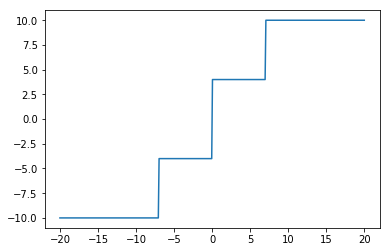

In [31]:
plt.plot(np.linspace(-20, 20, num=400), pw_step_function(np.linspace(-20, 20, num=400)))

In [34]:
pw_step_function(np.random.randint(low=-20, high=20, size=(30, 30))).reshape(-1)

{-10, -4, 0, 4, 10}

In [39]:
pw_step_function(np.array([-1, 0, 1]))

array([-4,  4,  4])

In [44]:
num_x0_points = 300
x0_test = np.linspace(-3*5, 3*5, num=num_x0_points)

In [46]:
def pw_step_function(x_arr): 
  '''
  Performs a piecewise step operation on every element of x_arr.
  x_arr: A numpy 1D array of real numbers of shape (N, )
  returns: A numpy 1D array of shape (N, ) whose values are in [-10, -4, 4, 10]
  '''
  return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
    [-10, -4, 4, 10])

In [49]:
x1_test = pw_step_function(x0_test)

In [57]:
x1_test[5].reshape(1, 1)

array([[-10.]])

In [53]:
z_test = np.random.normal(scale=1, size=num_x0_points)

In [56]:
z_test[5].reshape(1, 1)

array([[-0.01201207]])

In [58]:
def pw_step_function(x_arr): 
  '''
  Performs a piecewise step operation on every element of x_arr.
  x_arr: A numpy 1D array of real numbers of shape (N, )
  returns: A numpy 1D array of shape (N, ) whose values are in [-10, -4, 4, 10]
  '''
  return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
    [-10, -4, 4, 10])

In [59]:
pw_step_function(x0_test)

array([-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
       -10., -10., -10.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,
        -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,
        -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,
        -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,
        -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,
        -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,
        -4.,  -4.,  -4.,  -4.,  -4.,  -4.,  -4.,   

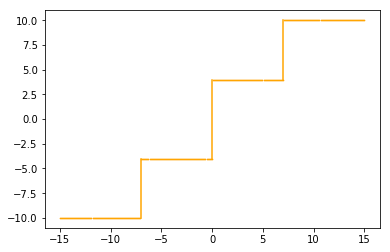

In [63]:
# return np.piecewise(x_arr, [x_arr < -7, (x_arr >= -7) & (x_arr < 0), (x_arr >= 0) & (x_arr < 7), x_arr > 7],
#     [-10, -4, 4, 10])
plt.scatter(x0_test, pw_step_function(x0_test), c='orange', s=0.5)
plt.plot([-7, -7], [-10, -4], c='orange')
plt.plot([0, 0], [-4, 4], c='orange')
plt.plot([7, 7], [4, 10], c='orange')